# <p style="text-align:center"> **GIAI ĐOẠN 2: TIỀN XỬ LÝ DỮ LIỆU** </p>
---
- **Về công cụ**: Sử dụng numpy và pandas để tiền xử lý dữ liệu. 
- Bước này dùng để tiền xử lý và khám phá dữ liệu.
---

### <p style="text-align:center"> **I. IMPORT THƯ VIỆN CẦN THIẾT** </p>

In [54]:
# Import thư viện cần thiết để tiền xử lý dữ liệu
import pandas as pd
import numpy as np 

# Import thư viện để trực quan những kết quả tìm hiểu được:
import matplotlib.pyplot as plt

### <p style="text-align:center"> **II. DATA EXPLORATIONS AND PREPROCESSING** </p>
#### <p style="text-align:center"> **0. Cái nhìn sơ lược về bộ dữ liệu** </p>
- Bộ dữ liệu được chia làm 4 phần, tương ứng với mỗi phần là vị trí của cầu thủ trong một đội bóng. 4 vị trí lần lượt là defender (hậu vệ), forward (tiền đạo), keeper (thủ môn), midfielder (tiền vệ). 

In [55]:
# Đọc hết dữ liệu trong CSV về các biến tương ứng
dfKeeper = pd.read_csv('../DATA/keeper_data.csv')
dfForward = pd.read_csv('../DATA/forward_data.csv')
dfDefender = pd.read_csv('../DATA/defender_data.csv')
dfMidfielder = pd.read_csv('../DATA/midfielder_data.csv')

- Để có cái nhìn sơ lược về dữ liệu, nhóm em in ra 5 dòng đầu tiên và các đặc điểm chính của mỗi bộ dữ liệu.

In [56]:
dfKeeper.head() 

,Player name,Appearances,Clean sheets,Wins,Losses,Saves,Penalties saved,Punches,High claims,Catches,...,Errors leading to goal,Own goals,Yellow cards,Red cards,Fouls,Goals,Assists,Passes,Passes per match,Accurate long balls
0,Adrián,139,38,57,45,464,5,57,150,53,...,10,0,10,2,5,0,0,"3,481",25.04,"1,096"
1,Alisson,150,68,104,17,341,2,67,64,21,...,8,1,2,1,3,1,3,"4,471",29.81,617
2,Álvaro Fernández,12,1,3,7,49,0,4,8,4,...,1,1,0,0,0,0,0,456,38.00,80
3,Alphonse Aréola,39,9,5,21,118,0,27,23,5,...,2,0,2,0,1,0,0,913,23.41,177
4,Kepa Arrizabalaga,86,29,45,24,186,1,25,38,12,...,3,0,3,0,0,0,0,"2,435",28.31,398


In [57]:
dfForward.head()

,Player name,Appearances,Goals Overview,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
0,Terry Ablade,0,0,0,0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tammy Abraham,89,26,36,33,26,0.29,3,20,1,...,32,2,0,56,39,25,31,12,55,45
2,Adam Armstrong,52,3,8,32,3,0.06,0,1,2,...,39,2,0,28,4,24,19,6,10,7
3,Adama Traoré,172,9,49,76,9,0.05,1,7,1,...,547,8,0,142,30,122,55,34,40,22
4,Simon Adingra,0,0,0,0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dfDefender.head()

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Tackle success,Last man tackles,...,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Zach Abbott,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
1,Tosin Adarabioyo,43,1,9,19,10,61,48,48%,0,...,142,1,0,22,2,1,1,0,0,0
2,Tayo Adaramola,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
3,Joshua Addae,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
4,Nayef Aguerd,1,0,0,1,0,1,1,100%,0,...,6,0,0,0,0,0,0,0,0,0


In [59]:
dfMidfielder.head()

,Player name,Appearances,Goals overview,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Interceptions,Clearances,Headed clearances,Recoveries,Duels won,Duels lost,Succesful 50/50s,Aerial battles won,Aerial battles lost,Errors leading to goal
0,Brenden Aaronson,14,1,4,7,1,0.07,0,1,0,...,1.0,5.0,1.0,68,77,106,19.0,6.0,17.0,0.0
1,Tyler Adams,13,0,4,6,0,13.00,0,0,0,...,16.0,11.0,2.0,104,75,62,2.0,10.0,7.0,0.0
2,Marc Albrighton,307,19,117,110,19,0.06,2,15,2,...,292.0,204.0,60.0,"1,437","1,128","1,346",336.0,84.0,233.0,0.0
3,Allan,52,0,20,23,0,52.00,0,0,0,...,42.0,59.0,23.0,378,273,299,52.0,16.0,26.0,1.0
4,Charlie Allen,0,0,0,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


#### <p style="text-align:center"> **1. Số hàng và cột trong bộ dữ liệu** </p>
- Mỗi vị trí khác nhau sẽ có các thuộc tính dữ liệu khác nhau. Như vậy, mỗi bộ dữ liệu sẽ có các thông tin và đặc điểm riêng của nó.
- Bước đầu tiên, nhóm em đọc file dữ liệu đưa vào các DataFrame để xử lý:

In [60]:
# Midfielder
print("Số hàng (số cầu thủ) của tiền vệ: ", dfMidfielder.shape[0])
print("Số cột (số thuộc tính) của tiền vệ: ", dfMidfielder.shape[1])

Số hàng (số cầu thủ) của tiền vệ:  1808
Số cột (số thuộc tính) của tiền vệ:  42


In [61]:
# Defender
print("Số hàng (số cầu thủ) của hậu vệ: ", dfDefender.shape[0])
print("Số cột (số thuộc tính) của hậu vệ: ", dfDefender.shape[1])

Số hàng (số cầu thủ) của hậu vệ:  1673
Số cột (số thuộc tính) của hậu vệ:  40


In [62]:
# Keeper
print("Số hàng (số cầu thủ) của thủ môn: ", dfKeeper.shape[0])
print("Số cột (số thuộc tính) của thủ môn: ", dfKeeper.shape[1])

Số hàng (số cầu thủ) của thủ môn:  592
Số cột (số thuộc tính) của thủ môn:  25


In [63]:
# Forward
print("Số hàng (số cầu thủ) của tiền đạo: ", dfForward.shape[0])
print("Số cột (số thuộc tính) của tiền đạo: ", dfForward.shape[1])

Số hàng (số cầu thủ) của tiền đạo:  1062
Số cột (số thuộc tính) của tiền đạo:  31


#### <p style="text-align:center"> **2. Ý nghĩa mỗi cột và mỗi hàng** <p>
- Mỗi hàng trong bộ dữ liệu chỉ ra các chỉ số của cầu thủ trong tổng số các giải đấu ngoại hạng Anh mà họ đã tham gia trước đó, được trang chủ chính thức của Premier League tổng hợp. Có một số hàng bất thường chỉ chứa toàn giá trị là số 0, tức là cầu thủ đó chưa ra sân hoặc nằm ở vị trí dự bị.
- Mỗi cột ở mỗi bộ sẽ tương ứng với thuộc tính của cầu thủ trong bộ dữ liệu đó. Tất cả bộ dữ liệu có một vài thuộc tính giống nhau nhưng nhìn chung không nhiều, dưới đây là các thuộc tính đó:
  - **Player name**: Tên cầu thủ.
  - **Appearances**: Số lần ra sân của cầu thủ.
  - **Goals Overview**: Tổng số bàn thắng của các cầu thủ.
  - **Wins**: Tổng số trận thắng của cầu thủ.
  - **Losses**: Tổng số trận thua của cầu thủ.
  - **Yellow cards**: Tổng số thẻ vàng của cầu thủ.
  - **Red cards**: Tổng số thẻ đỏ của cầu thủ.
  - **Assists**: Tổng số đường kiến tạo.
  - **Passes**: Tổng số đường chuyền.
  - **Passes per match**: Số đường chuyền trung bình mỗi trận. 
- Ngoài ra, các bộ còn có đặc trưng riêng của mình, lần lượt được thể hiện trong các tác vụ khám phá dữ liệu sau đây:

---
**TIỀN XỬ LÝ DỮ LIỆU: LỌC BỎ CỘT TRÙNG**
- Mặc dù trong bộ dữ liệu theo quan sát thì không có thuộc tính nào trùng lặp, nhưng để chắc chắn thì nhóm em vẫn thực hiện việc xóa hết các cột trùng với nhau và in ra số lượng cột sau khi đã lọc trùng đó.

In [64]:
# Khi quan sát bộ dữ liệu, có một vài thuộc tính trùng, nhóm em xóa hết các thuộc tính 
# trùng đó và in ra số lượng cuối cùng thuộc tính:

# Lọc trùng của midfielder
temp = dfMidfielder.T.drop_duplicates().T
dfMidfielder = temp

# Lọc trùng của defender
temp = dfDefender.T.drop_duplicates().T
dfDefender = temp

# Lọc trùng của forward
temp = dfForward.T.drop_duplicates().T
dfForward = temp

# Lọc trùng của keeper
temp = dfKeeper.T.drop_duplicates().T
dfKeeper = temp

In [65]:
# Keeper
print("Số lượng thuộc tính sau khi lọc của thủ môn:", dfKeeper.columns.size)
dfKeeper.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của thủ môn: 24


array(['Player name', 'Appearances', 'Clean sheets', 'Wins', 'Losses',
       'Saves', 'Penalties saved', 'Punches', 'High claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal kicks', 'Goals conceded',
       'Errors leading to goal', 'Own goals', 'Yellow cards', 'Red cards',
       'Fouls', 'Goals', 'Assists', 'Passes', 'Passes per match',
       'Accurate long balls'], dtype=object)

- Trong tất cả các mùa giải, thủ môn có các thuộc tính như sau: 
  - **Clean sheets**: Tổng số trận giữ sạch lưới.
  - **Saves**: Tổng số lần cứu thua (cản phá cú sút).
  - **Penalties Saved**: Tổng số lần cản phá trên chấm phạt đền.
  - **Punches**: Tổng số cú đấm bóng.
  - **High Claims**: Tổng số cú bắt bóng từ những đường tạt bóng.
  - **Catches**: Tổng số cú bắt dính bóng từ những cú sút.
  - **Sweeper Clearances**: Tổng số tình huống cứu thua khi đối đầu trực tiếp với đối phương.
  - **Throw Outs**: Tổng số tình huống ném bóng lên.
  - **Goal Kicks**: Tổng số tình huống phát bóng lên.
  - **Goals Conceded**: Tổng số bàn thua.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Accurate long balls**: số đường chuyền dài chính xác.

In [66]:
# Defender
print("Số lượng thuộc tính sau khi lọc của hậu vệ:", dfDefender.columns.size)
dfDefender.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của hậu vệ: 39


array(['Player name', 'Appearances', 'Goals Overview', 'Wins', 'Losses',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed clearance', 'Clearances off line', 'Recoveries',
       'Duels won', 'Duels lost', 'Successful 50/50s',
       'Aerial battles won', 'Aerial battles lost', 'Own goals',
       'Errors leading to goal', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Cross accuracy',
       'Through balls', 'Accurate long balls', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Hit woodwork'],
      dtype=object)

- Trong tất cả các mùa giải, hậu vệ có các thuộc tính như sau:   
  - **Clean sheets**: Tổng số trận giữ sạch lưới.
  - **Goals Conceded**: Tổng số bàn thua.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Tackle success**: Tổng số chủ động đoạt bóng bóng thành công.
  - **Last man tackles**: Tổng số lần tranh chấp bóng thành công với cương vị là cầu thủ phòng thủ cuối cùng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.
  - **Clearances off line**: Tổng số tình huống phá bóng lên ở gần vạch vôi.
  - **Recoveries**: Tổng số tình huống chiếm lại quyền kiểm soát bóng.
  - **Duels won**: Tổng số tình huống đối đầu thành công.
  - **Duels lost**: Tổng số tình huống đối đầu thất bại.
  - **Successful 50/50s**: Tổng số tình huống tranh chấp bóng sống thành công.
  - **Aerial battles won**: Tổng số tình huống tranh chấp bóng bổng thành công.
  - **Aerial battles lost**: Tổng số tình huống tranh chấp bóng bổng thất bại.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.
  - **Big chance created**: Tổng số những cơ hội thành bàn được tạo ra.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Cross accuracy**: Tỉ lệ tạt bóng chính xác.
  - **Through balls**: Tổng số đường chọc khe.
  - **Accurate long balls**: Tổng số đường chuyển dài chính xác.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Hit woodword**: Tổng số cú sút chạm cột dọc hoặc xà ngang.

In [67]:
# Forward
print("Số lượng thuộc tính sau khi lọc của tiền đạo:", dfForward.columns.size)
dfForward.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của tiền đạo: 30


array(['Player name', 'Appearances', 'Goals Overview', 'Wins', 'Losses',
       'Goals per match', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored',
       'Shots', 'Shots on target', 'Shooting accuracy', 'Hit woodwork',
       'Big chances missed', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Yellow cards', 'Red cards',
       'Fouls', 'Offsides', 'Tackles', 'Blocked shots', 'Interceptions',
       'Clearances', 'Headed clearance'], dtype=object)

- Trong tất cả các mùa giải, tiền đạo có các thuộc tính như sau: 
  - **Goals per match**: Số bàn thắng trung bình mỗi trận.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Penalties scored**: Tổng số bàn thắng ghi từ chấm phạt đền.
  - **Freekicks scored**: Tổng số bàn thắng ghi từ tình huống đá phạt trực tiếp.
  - **Shots**: Tổng số cú sút.
  - **Shots on target**: Tổng số cú sút trúng đích.
  - **Shooting accuracy**: Tỉ lệ chính xác của những cú sút.
  - **Hit woodwork**: Tổng số cú sút chạm cột dọc hoặc xà ngang.
  - **Big chances missed**: Tổng những cơ hội thành bàn bị bỏ lỡ.
  - **Big chance created**: Tổng số những cơ hội thành bàn được tạo ra.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.

In [68]:
# Midfielder
print("Số lượng thuộc tính sau khi lọc của tiền vệ:", dfMidfielder.columns.size)
dfMidfielder.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của tiền vệ: 41


array(['Player name', 'Appearances', 'Goals overview', 'Wins', 'Losses',
       'Goals per match', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored',
       'Shots', 'Shots on target', 'Shooting accuracy', 'Hit woodwork',
       'Big chances missed', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Cross accuracy',
       'Through balls', 'Accurate long balls', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides', 'Tackles', 'Tackle success',
       'Blocked shots', 'Interceptions', 'Clearances',
       'Headed clearances', 'Recoveries', 'Duels won', 'Duels lost',
       'Succesful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Errors leading to goal'], dtype=object)

- Trong tất cả các mùa giải, tiền vệ có các thuộc tính như sau: 
  - **Goals per match**: Số bàn thắng trung bình mỗi trận.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Penalties scored**: Tổng số bàn thắng ghi từ chấm phạt đền.
  - **Freekicks scored**: Tổng số bàn thắng ghi từ tình huống đá phạt trực tiếp.
  - **Shots**: Tổng số cú sút.
  - **Shots on target**: Tổng số cú sút trúng đích.
  - **Shooting accuracy**: Tỉ lệ chính xác của những cú sút.
  - **Hit woodwork**: Tổng số cú sút chạm cột dọc hoặc xà ngang.
  - **Big chances missed**: Tổng những cơ hội thành bàn bị bỏ lỡ.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Cross accuracy**: Tỉ lệ tạt bóng chính xác.
  - **Through balls**: Tổng số đường chọc khe.
  - **Accurate long balls**: Tổng số đường chuyển dài chính xác.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.
  - **Recoveries**: Tổng số tình huống chiếm lại quyền kiểm soát bóng.
  - **Duels won**: Tổng số tình huống đối đầu thành công.
  - **Duels lost**: Tổng số tình huống đối đầu thất bại.
  - **Successful 50/50s**: Tổng số tình huống tranh chấp bóng sống thành công.
  - **Aerial battles won**: Tổng số tình huống tranh chấp bóng bổng thành công.
  - **Aerial battles lost**: Tổng số tình huống tranh chấp bóng bổng thất bại.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.

#### <p style="text-align:center"> **3. Suy diễn thuộc tính** </p>

- Vị trí cầu thủ nào cũng có thuộc tính suy diễn (có thể tính toán, suy ra từ các thuộc tính khác), nhóm em xóa các thuộc tính đó để có bộ dữ liệu đạt chuẩn hơn.
  - Thuộc tính suy diễn của thủ môn: $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  - Thuộc tính suy diễn của hậu vệ: $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  - Thuộc tính suy diễn của tiền vệ: $$Goals \ per \ match = \frac{Goals}{Appearances}$$ 
  $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  $$Shooting \ Accuracy = \frac{Shots \ on \ target}{Shots}$$
  - Thuộc tính suy diễn của tiền đạo: $$Goals \ per \ match = \frac{Goals}{Appearances}$$
  $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  $$Shooting \ Accuracy = \frac{Shots \ on \ target}{Shots}$$

---
**TIỀN XỬ LÝ DỮ LIỆU: BỎ THUỘC TÍNH SUY DIỄN, THUỘC TÍNH KHÔNG CẦN THIẾT:**

In [69]:
dfKeeper.drop('Passes per match', axis = 1, inplace = True)

dfDefender.drop('Passes per match', axis = 1, inplace = True)

dfMidfielder.drop('Goals per match', axis = 1, inplace = True)
dfMidfielder.drop('Passes per match', axis = 1, inplace = True)
dfMidfielder.drop('Shooting accuracy', axis = 1, inplace = True)

dfForward.drop('Shooting accuracy', axis = 1, inplace = True)
dfForward.drop('Passes per match', axis = 1, inplace = True)
dfForward.drop('Goals per match', axis = 1, inplace = True)

#### <p style="text-align:center"> **4. Sự trùng lắp dữ liệu các hàng** </p>
- Bộ dữ liệu được lấy từ 5 mùa giải gần nhất để xây dựng ứng dụng nên sẽ có một số cầu thủ bị trùng lắp. Mặc dù với các năm thì bộ thống kê của cầu thủ đó sẽ khác nhưng website luôn cập nhật các cầu thủ đó về một năm mới nhất khi nhấn vào trang thông tin cá nhân thì chỉ cần kiểm tra tên của họ có trong bộ dữ liệu không là đã được gọi là trùng.
- Để lý giải cho việc trùng lắp này là có thể một phần nhỏ là website trong quá trình lưu dữ liệu bị lỗi, còn phần lớn là do các cầu thủ của các năm trước tham gia đá lại vào mùa giải các năm sau.

In [70]:
# Đếm số giá trị trùng.
num_duplicate_data_Defender = dfDefender.duplicated().sum()
print("Số giá trị bị trùng lắp của hậu vệ: ", num_duplicate_data_Defender)

num_duplicate_data_Forward = dfForward.duplicated().sum()
print("Số giá trị bị trùng lắp của tiền đạo: ", num_duplicate_data_Forward)

num_duplicate_data_Keeper = dfKeeper.duplicated().sum()
print("Số giá trị bị trùng lắp của thủ môn: ", num_duplicate_data_Keeper)

num_duplicate_data_Midfielder = dfMidfielder.duplicated().sum()
print("Số giá trị bị trùng lắp của tiền vệ: ", num_duplicate_data_Midfielder)

Số giá trị bị trùng lắp của hậu vệ:  1335
Số giá trị bị trùng lắp của tiền đạo:  850
Số giá trị bị trùng lắp của thủ môn:  475
Số giá trị bị trùng lắp của tiền vệ:  1444


---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA CÁC HÀNG TRÙNG:**

In [71]:
# Xóa các hàng trùng
dfDefender.drop_duplicates(inplace = True)
print("Số hậu vệ sau khi lọc trùng: ", dfDefender.shape[0])

dfMidfielder.drop_duplicates(inplace = True)
print("Số tiền vệ sau khi lọc trùng: ", dfMidfielder.shape[0])

dfForward.drop_duplicates(inplace = True)
print("Số tiền đạo sau khi lọc trùng: ", dfForward.shape[0])

dfKeeper.drop_duplicates(inplace = True)
print("Số thủ môn sau khi lọc trùng: ", dfKeeper.shape[0])

Số hậu vệ sau khi lọc trùng:  338
Số tiền vệ sau khi lọc trùng:  364
Số tiền đạo sau khi lọc trùng:  212
Số thủ môn sau khi lọc trùng:  117


#### <p style="text-align:center"> **5. Độ quan trọng của thuộc tính.** </p>
- Như vậy, sau khi đã phân tích rõ ý nghĩa các bộ dữ liệu, nhóm em sẽ bắt đầu thực hiện lọc bỏ các thuộc tính không cần thiết để cho các tác vụ sau được nhanh chóng và gọn hơn.
- Để thực hiện xây dựng mô hình, nhóm em giữ lại các thuộc tính chung của 3 vị trí: Tiền vệ, tiền đạo, hậu vệ, còn thủ môn về tính chất của nó rất khác với các vị trí trên nên không được đưa vào xây dựng mô hình. 
  - Các **thuộc tính chung** đó gồm có: *Player name, Appearances, Goals Overview, Wins, Losses, Headed goals, Goals with right foot, Goals with left foot, Hit woodwork, Assists, Passes, Crosses, Yellow cards, Red cards, Fouls, Offsides, Tackles, Blocked shots, Interceptions, Clearances.*
- Về các thuộc tính riêng trên mỗi bộ, vì đã xác định được câu hỏi cần trả lời và biết cách thực hiện cài đặt đoạn code đó như thế nào nên ở các vị trí, thực hiện loại bỏ các thuộc tính không cần thiết sau đây:
  - **Tiền đạo** bỏ: *Penalty scored, Freekick scored*.
  - **Tiền vệ** bỏ: *Penalty scored, Freekick scored, Big chance missed, Tackle success, Head clearance, Recoveries, Duels lost, Duels won, Successful 50/50s, Aerial battles win, Aerial battles lost, Errors leading to goal*.
  - **Hậu vệ** bỏ: *Tackle success, Last man tackle, Recoveries, Duels lost, Duels won, Successful 50/50s, Aerial battles win, Aerial battles lost, Own goals, Cross accuracy, Accurate through balls.*
  - **Thủ môn** bỏ: *Clean sheets, Saves, Penalties saved, Throw outs, Goal kicks, Goals conceded, Errors leading to goal, Own goals, Assists, Passes, Accurate long balls*.

---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA CÁC THUỘC TÍNH KHÔNG CẦN THIẾT:**

Sử dụng hàm `drop` của pandas để xóa các thuộc tính từ các bộ dữ liệu:

In [72]:
# Xóa của forward
dfForward.drop("Penalties scored", inplace=True, axis=1)
dfForward.drop("Freekicks scored", inplace=True, axis=1)

# Xóa của midfielder
dfMidfielder.drop("Penalties scored", inplace=True, axis=1)
dfMidfielder.drop("Freekicks scored", inplace=True, axis=1)
dfMidfielder.drop("Big chances missed", inplace=True, axis=1)
dfMidfielder.drop("Tackle success", inplace=True, axis=1)
dfMidfielder.drop("Headed clearances", inplace=True, axis=1)
dfMidfielder.drop("Recoveries", inplace=True, axis=1)
dfMidfielder.drop("Duels lost", inplace=True, axis=1)
dfMidfielder.drop("Duels won", inplace=True, axis=1)
dfMidfielder.drop("Succesful 50/50s", inplace=True, axis=1)
dfMidfielder.drop("Aerial battles won", inplace=True, axis=1)
dfMidfielder.drop("Aerial battles lost", inplace=True, axis=1)
dfMidfielder.drop("Errors leading to goal", inplace=True, axis=1)

# Xóa của defender
dfDefender.drop("Tackle success", inplace=True, axis=1)
dfDefender.drop("Last man tackles", inplace=True, axis=1)
dfDefender.drop("Recoveries", inplace=True, axis=1)
dfDefender.drop("Duels lost", inplace=True,  axis=1)
dfDefender.drop("Duels won", inplace=True, axis=1)
dfDefender.drop("Successful 50/50s", inplace=True, axis=1)
dfDefender.drop("Aerial battles won", inplace=True, axis=1)
dfDefender.drop("Aerial battles lost", inplace=True, axis=1)
dfDefender.drop("Own goals", inplace=True, axis=1)
dfDefender.drop("Cross accuracy", inplace=True, axis=1)
dfDefender.drop("Accurate long balls", inplace=True, axis=1)

# Xóa của keeper
dfKeeper.drop("Clean sheets", inplace=True, axis=1)
dfKeeper.drop("Saves", inplace=True, axis=1)
dfKeeper.drop("Penalties saved", inplace=True, axis=1)
dfKeeper.drop("Throw outs", inplace=True, axis=1)
dfKeeper.drop("Goal kicks", inplace=True, axis=1)
dfKeeper.drop("Goals conceded", inplace=True, axis=1)
dfKeeper.drop("Errors leading to goal", inplace=True, axis=1)
dfKeeper.drop("Own goals", inplace=True, axis=1)
dfKeeper.drop("Assists", inplace=True, axis=1)
dfKeeper.drop("Passes", inplace=True, axis=1)
dfKeeper.drop("Accurate long balls", inplace=True, axis=1)

#### <p style="text-align:center"> **6. Kiểu dữ liệu của mỗi cột là gì?** </p>
- Đầu tiên, khi nhìn vào bộ dữ liệu của mỗi vị trí còn có một số thuộc tính bị dính tới ký tự đặc biệt là %. Việc có ký tự này sẽ làm cho cả thuộc tính đó sẽ là `string`, không phải là thuộc tính số nên cần giải quyết trường hợp này để sẵn sàng cho bước chuyển kiểu dữ liệu tiếp theo:
---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA KÝ TỰ ĐẶC BIỆT CỦA CÁC CỘT CẦN XÉT:**
- Sử dụng `replace` của `string` để thay thế ký tự % và gán lại cột đã xử lý. Khi gán xong thì ép nó về kiểu numeric, cụ thể là kiểu `float`.

In [73]:
dfMidfielder['Cross accuracy'] = dfMidfielder['Cross accuracy'].str.replace("%","")

# Có một cầu thủ ngoại lệ là Pierre Ekwah, do web bị lỗi thuộc tính nên 
# Goals with right foot sẽ bị đổi với cột Shooting accuracy, nhóm xóa tên cầu thủ này:
dfMidfielder.drop(dfMidfielder[dfMidfielder['Player name'] == 'Pierre Ekwah'].index, inplace=True)

dfMidfielder['Cross accuracy'] = pd.to_numeric(dfMidfielder['Cross accuracy'], downcast='float')

---

- Việc chuyển kiểu dữ liệu với mục đích sử dụng các hàm tính toán được dễ dàng hơn.
- Đầu tiên, nhóm tiến hành kiểm tra trên toàn tập các bộ dữ liệu:

In [74]:
# Kiểu dữ liệu của từng cột trong forward:
Forward_types = dfForward.dtypes
Forward_types

Player name              object
Appearances              object
Goals Overview           object
Wins                     object
Losses                   object
Headed goals             object
Goals with right foot    object
Goals with left foot     object
Shots                    object
Shots on target          object
Hit woodwork             object
Big chances missed       object
Assists                  object
Passes                   object
Big chances created      object
Crosses                  object
Yellow cards             object
Red cards                object
Fouls                    object
Offsides                 object
Tackles                  object
Blocked shots            object
Interceptions            object
Clearances               object
Headed clearance         object
dtype: object

In [75]:
# Kiểu dữ liệu của từng cột trong defender:
Defender_types = dfDefender.dtypes
Defender_types

Player name               object
Appearances               object
Goals Overview            object
Wins                      object
Losses                    object
Clean sheets              object
Goals conceded            object
Tackles                   object
Blocked shots             object
Interceptions             object
Clearances                object
Headed clearance          object
Clearances off line       object
Errors leading to goal    object
Assists                   object
Passes                    object
Big chances created       object
Crosses                   object
Through balls             object
Yellow cards              object
Red cards                 object
Fouls                     object
Offsides                  object
Headed goals              object
Goals with right foot     object
Goals with left foot      object
Hit woodwork              object
dtype: object

In [76]:
# Kiểu dữ liệu của từng cột trong keeper:
Keeper_types = dfKeeper.dtypes
Keeper_types


Player name           object
Appearances           object
Wins                  object
Losses                object
Punches               object
High claims           object
Catches               object
Sweeper clearances    object
Yellow cards          object
Red cards             object
Fouls                 object
Goals                 object
dtype: object

In [77]:
# Kiểu dữ liệu của từng cột trong midfielder
MidFielder_types = dfMidfielder.dtypes
MidFielder_types 

Player name               object
Appearances               object
Goals overview            object
Wins                      object
Losses                    object
Headed goals              object
Goals with right foot     object
Goals with left foot      object
Shots                     object
Shots on target           object
Hit woodwork              object
Assists                   object
Passes                    object
Big chances created       object
Crosses                   object
Cross accuracy           float32
Through balls             object
Accurate long balls       object
Yellow cards              object
Red cards                 object
Fouls                     object
Offsides                  object
Tackles                   object
Blocked shots             object
Interceptions             object
Clearances                object
dtype: object

- Qua những đoạn code xuất các kiểu dữ liệu của thuộc tính, nhóm em nhận thấy rằng toàn bộ kiểu dữ liệu điều là object (trừ cột ở midfielder đã xử lý trước đó). Như vậy, nhóm sẽ tiến hành bước tiền xử lý chuyển kiểu dữ liệu.

---
**TIỀN XỬ LÝ DỮ LIỆU: CHUYỂN KIỂU DỮ LIỆU VỀ ĐÚNG DẠNG MONG MUỐN:**

- Trước khi tiến hành tiền xử lý, sử dụng hàm `open_object_dtype(s)` để lấy ra kiểu dữ liệu thực sự mà một cột đang chứa:

In [78]:
# Sử dụng hàm aply để lấy kiểu dữ liệu thực sự:
def open_object_dtype(s):
    dtypes = set()
    
    func = lambda e: dtypes.add(type(e))
    s.apply(func)
    
    return dtypes

- Bắt đầu với bộ dữ liệu midfielder:

In [79]:
midfielder_column = dfMidfielder.columns.to_list() 
for col in midfielder_column:
    print(col, ":", open_object_dtype(dfMidfielder[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'str'>}
Goals with left foot : {<class 'int'>}
Shots : {<class 'int'>}
Shots on target : {<class 'int'>}
Hit woodwork : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Cross accuracy : {<class 'float'>}
Through balls : {<class 'int'>}
Accurate long balls : {<class 'str'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'str'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'float'>}
Interceptions : {<class 'float'>}
Clearances : {<class 'float'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Goals with right foot`, `Passes`, `Crosses`, `Accurate long balls` (bị dính dấu %), `Offsides` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định khi dữ liệu lớn hơn hàng 1000). 

In [80]:
# Xóa bỏ dấu ,
dfMidfielder['Passes'] = dfMidfielder['Passes'].str.replace(",","")
dfMidfielder['Crosses'] = dfMidfielder['Crosses'].str.replace(",","")
dfMidfielder['Offsides'] = dfMidfielder['Offsides'].str.replace(",","")

- Bộ dữ liệu keeper:

In [81]:
keeper_column = dfKeeper.columns.to_list() 
for col in keeper_column:
    print(col, ":", open_object_dtype(dfKeeper[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Punches : {<class 'int'>}
High claims : {<class 'int'>}
Catches : {<class 'int'>}
Sweeper clearances : {<class 'int'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Goals : {<class 'int'>}


Không có các kiểu dữ liệu ngoại lệ.

- Bộ dữ liệu forward:

In [82]:
forward_column = dfForward.columns.to_list() 
for col in forward_column:
    print(col, ":", open_object_dtype(dfForward[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals Overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'int'>}
Goals with left foot : {<class 'int'>}
Shots : {<class 'str'>}
Shots on target : {<class 'int'>}
Hit woodwork : {<class 'int'>}
Big chances missed : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'int'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'int'>}
Interceptions : {<class 'int'>}
Clearances : {<class 'int'>}
Headed clearance : {<class 'int'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Shots`, `Passes`, `Crosses` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định). 

In [83]:
# Xóa bỏ dấu , trong bộ dữ liệu 
dfForward['Passes'] = dfForward['Passes'].str.replace(",","")
dfForward['Crosses'] = dfForward['Crosses'].str.replace(",","")
dfForward['Shots'] = dfForward['Shots'].str.replace(",","")

- Bộ dữ liệu defender:

In [84]:
defender_column = dfDefender.columns.to_list() 
for col in defender_column:
    print(col, ":", open_object_dtype(dfDefender[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals Overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Clean sheets : {<class 'int'>}
Goals conceded : {<class 'int'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'int'>}
Interceptions : {<class 'int'>}
Clearances : {<class 'str'>}
Headed clearance : {<class 'str'>}
Clearances off line : {<class 'int'>}
Errors leading to goal : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Through balls : {<class 'int'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'int'>}
Goals with left foot : {<class 'int'>}
Hit woodwork : {<class 'int'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Clearances`, `Headed clearance`, `Passes`, `Crosses` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định khi dữ liệu lớn hơn hàng 1000). 

In [85]:
dfDefender['Clearances'] = dfDefender['Clearances'].str.replace(",","")
dfDefender['Headed clearance'] = dfDefender['Headed clearance'].str.replace(",","")
dfDefender['Passes'] = dfDefender['Passes'].str.replace(",","")
dfDefender['Crosses'] = dfDefender['Crosses'].str.replace(",","")

- Như vậy, ta chuyển hết tất cả các thuộc tính của từng bộ dữ liệu (trừ thủ môn) về giá trị số (trừ `Player name`). Tiến hành chuyển kiểu dữ liệu của cột bằng cách sử dụng hàm `to_numeric`.

In [86]:
# Bỏ player name từ mảng tên cột của từng bộ dữ liệu

# Defender
defender_columns = dfDefender.columns.to_list()
defender_columns.remove('Player name')

for col in defender_columns:
    dfDefender[col] = pd.to_numeric(dfDefender[col], errors='coerce')

# Forward
forward_columns = dfForward.columns.to_list()
forward_columns.remove('Player name')

for col in forward_columns:
    dfForward[col] = pd.to_numeric(dfForward[col], errors='coerce')

# Midfielder
midfielder_columns = dfMidfielder.columns.to_list()
midfielder_columns.remove('Player name')

for col in midfielder_columns:
    dfMidfielder[col] = pd.to_numeric(dfMidfielder[col], errors='coerce')

#### <p style="text-align:center"> **7. Thiếu dữ liệu** </p>
- Trong quá trình crawling dữ liệu thì sẽ có rất ít các thuộc tính từ các bộ bị thiếu dữ liệu. Ở mục 7 nhóm em sẽ tìm ra các gía trị đó và xóa hàng bị thiếu dữ liệu đó ra khỏi bộ dữ liệu.
- Đầu tiên, nhóm kiểm tra từng bộ dữ liệu có thuộc tính nào bị mất dữ liệu hay không:

##### <p style="text-align:center"> **7.1 Xử lý bộ tiền đạo** </p>

- Đầu tiên, kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [87]:
# Kiểm tra trên bộ dữ liệu tiền đạo
dfForward.isnull().sum()

Player name              0
Appearances              0
Goals Overview           0
Wins                     0
Losses                   0
Headed goals             0
Goals with right foot    0
Goals with left foot     0
Shots                    0
Shots on target          0
Hit woodwork             0
Big chances missed       0
Assists                  0
Passes                   0
Big chances created      0
Crosses                  0
Yellow cards             0
Red cards                0
Fouls                    0
Offsides                 0
Tackles                  0
Blocked shots            0
Interceptions            0
Clearances               0
Headed clearance         0
dtype: int64

- Tiền đạo không bị thiếu dữ liệu ở bất kỳ cột nào.

##### <p style="text-align:center"> **7.2 Xử lý bộ dữ liệu tiền vệ** </p>

- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [88]:
# Kiểm tra trên bộ dữ liệu tiền vệ:
dfMidfielder.isnull().sum()

Player name              0
Appearances              0
Goals overview           0
Wins                     0
Losses                   0
Headed goals             0
Goals with right foot    0
Goals with left foot     0
Shots                    0
Shots on target          0
Hit woodwork             0
Assists                  0
Passes                   0
Big chances created      0
Crosses                  0
Cross accuracy           0
Through balls            0
Accurate long balls      3
Yellow cards             0
Red cards                0
Fouls                    0
Offsides                 0
Tackles                  0
Blocked shots            2
Interceptions            2
Clearances               2
dtype: int64

- Tiền vệ bị thiếu giá trị ở 4 thuộc tính là `Accurate long balls, Blocked shots' Interceptions, Clearances`. Ta drop hết các hàng có thuộc tính bị thiếu đó và xem lại bộ dữ liệu còn bao nhiêu giá trị.

In [89]:
dfMidfielder.dropna(inplace=True)
dfMidfielder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 1622
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            358 non-null    object 
 1   Appearances            358 non-null    int64  
 2   Goals overview         358 non-null    int64  
 3   Wins                   358 non-null    int64  
 4   Losses                 358 non-null    int64  
 5   Headed goals           358 non-null    int64  
 6   Goals with right foot  358 non-null    int64  
 7   Goals with left foot   358 non-null    int64  
 8   Shots                  358 non-null    int64  
 9   Shots on target        358 non-null    int64  
 10  Hit woodwork           358 non-null    int64  
 11  Assists                358 non-null    int64  
 12  Passes                 358 non-null    int64  
 13  Big chances created    358 non-null    int64  
 14  Crosses                358 non-null    int64  
 15  Cross

##### <p style="text-align:center"> **7.3 Xử lý dữ liệu thủ môn** </p>

- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [90]:
dfKeeper.isnull().sum()

Player name           0
Appearances           0
Wins                  0
Losses                0
Punches               0
High claims           0
Catches               0
Sweeper clearances    0
Yellow cards          0
Red cards             0
Fouls                 0
Goals                 0
dtype: int64

- Như vậy, thủ môn không có cột giá trị nào bị thiếu dữ liệu.

##### <p style="text-align:center"> **7.4 Xử lý dữ liệu hậu vệ** </p>
- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [91]:
dfDefender.isnull().sum()

Player name               0
Appearances               0
Goals Overview            0
Wins                      0
Losses                    0
Clean sheets              0
Goals conceded            0
Tackles                   0
Blocked shots             0
Interceptions             0
Clearances                0
Headed clearance          0
Clearances off line       0
Errors leading to goal    0
Assists                   0
Passes                    0
Big chances created       0
Crosses                   0
Through balls             0
Yellow cards              0
Red cards                 0
Fouls                     0
Offsides                  0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Hit woodwork              0
dtype: int64

- Như vậy, hậu vệ không có cột giá trị nào bị thiếu dữ liệu.

##### <p style="text-align:center"> **8. Phân loại thuộc tính và phân bổ của thuộc tính trong dữ liệu** </p>

- Các dữ liệu được đo đạc từ thực tế, nhất là với chủ đề về bóng đá thì hầu như rất ít thuộc tính phân loại. Vì bộ dữ liệu này liên quan đến tất cả các chỉ số của cầu thủ trong sự nghiệp thi đấu cho các mùa giải Ngoại hạng Anh nên tất cả thuộc tính đều là số.

##### <p style="text-align:center"> **8.1 Cầu thủ chưa ra sân** </p>

- Đầu tiên, nhóm sẽ kiểm tra xem có bao nhiêu cầu thủ mới (cầu thủ chưa chưa có thống kê cụ nên các chỉ số đều là 0) được trình làng.

In [92]:
# Midfielder - Thông tin các cầu thủ chưa vào sân:
info_new_midfieder = dfMidfielder[dfMidfielder['Appearances'] == 0]
info_new_midfieder

,Player name,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances
4,Charlie Allen,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
12,Keenan Appiah-Forson,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
13,Billy Arce,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
17,Arthur,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
18,Miguel Azeez,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Yegor Yarmolyuk,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
363,Denis Zakaria,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
364,Jan Zamburek,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
365,Zidane Iqbal,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0


Số cầu thủ ở vị trí tiền vệ chưa ra sân:  128


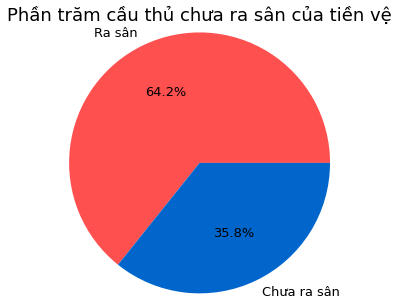

In [93]:
print("Số cầu thủ ở vị trí tiền vệ chưa ra sân: ", info_new_midfieder.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của tiền vệ', fontsize=18);
plt.pie((dfMidfielder['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [94]:
# Defender
info_new_defender = dfDefender[dfDefender['Appearances'] == 0]
info_new_defender

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,...,Crosses,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Zach Abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tayo Adaramola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Joshua Addae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ryan Alebiosu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Ajibola Alese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,Callum Rowe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,Oliver Casey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,Shea Charles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1502,Dennis Cirkin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí hậu vệ chưa ra sân:  128


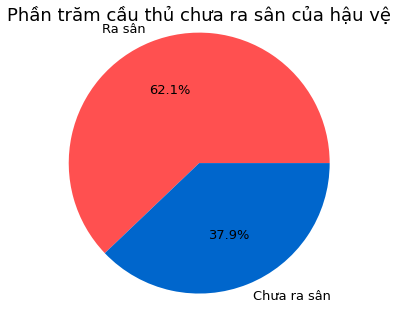

In [95]:
print("Số cầu thủ ở vị trí hậu vệ chưa ra sân: ", info_new_defender.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của hậu vệ', fontsize=18);
plt.pie((dfDefender['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [96]:
# Forward
info_new_forward = dfForward[dfForward['Appearances'] == 0]
info_new_forward

,Player name,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
0,Terry Ablade,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Simon Adingra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Victor Akinwale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,William Alves,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Dominic Ballard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,Louie Barry,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,Mika Biereth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Harvey Blair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,Mason Burstow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Leonardo Campana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí tiền đạo chưa ra sân:  54


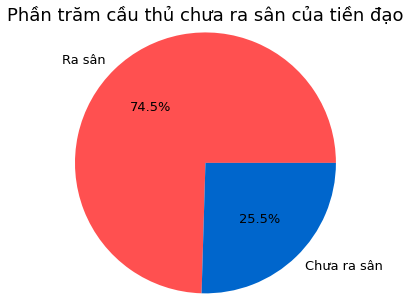

In [97]:
print("Số cầu thủ ở vị trí tiền đạo chưa ra sân: ", info_new_forward.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của tiền đạo', fontsize=18);
plt.pie((dfForward['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [98]:
# Keeper
info_new_keeper = dfKeeper[dfKeeper['Appearances'] == 0]
info_new_keeper

,Player name,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals
5,Brandon Austin,0,0,0,0,0,0,0,0,0,0,0
6,Ellery Balcombe,0,0,0,0,0,0,0,0,0,0,0
7,Lucas Bergström,0,0,0,0,0,0,0,0,0,0,0
9,Nathan Bishop,0,0,0,0,0,0,0,0,0,0,0
10,Nathan Baxter,0,0,0,0,0,0,0,0,0,0,0
12,Eddie Beach,0,0,0,0,0,0,0,0,0,0,0
19,Elia Caprile,0,0,0,0,0,0,0,0,0,0,0
21,Harry Christy,0,0,0,0,0,0,0,0,0,0,0
22,Matthew Cox,0,0,0,0,0,0,0,0,0,0,0
23,Billy Crellin,0,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí thủ môn chưa ra sân:  60


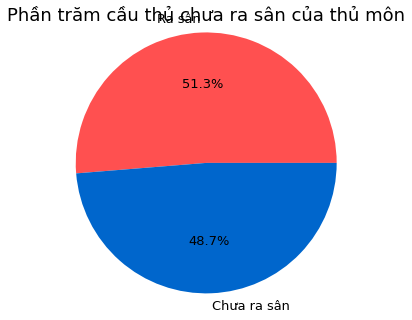

In [99]:
print("Số cầu thủ ở vị trí thủ môn chưa ra sân: ", info_new_keeper.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của thủ môn', fontsize=18);
plt.pie((dfKeeper['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

##### <p style="text-align:center"> **8.2 Phân bổ các thuộc tính** </p>

- Phân bổ các thuộc tính là số trên từng cầu thủ để các giá trị số được biểu diễn như thể nào trong bộ dữ liệu.
- Dựa trên những thông số thống kê để xác định được phân bố thuộc tính như thế nào. Ở đây nhóm không xét đến phần trăm giá trị bị thiếu vì cơ bản nhóm đã lọc bỏ trùng cho nó, như vậy thì nhóm chỉ còn xét: 
  - Giá trị min.
  - Giá trị lower quartile (phân vị 25).
  - Giá trị median (phân vị 50).
  - Giá trị upper quartile (phân vị 75).
  - Giá trị max.
  - Giá trị mean.

In [100]:
def lower_quantile(column):
    return column.quantile(q = 0.25)

def upper_quantile(column):
    return column.quantile(q = 0.75)

def mean(column):
    return column.mean()

def median(column):
    return column.median()

In [101]:
# Phân bổ giá trị cho thủ môn
keeper_numeric = dfKeeper.iloc[:, dfKeeper.columns != 'Player name']
keeper_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,51.0,17.00,20.00,21.00,46.00,11.00,23.00,2.00,0.00,1.00,0.00
max,391.0,210.00,134.00,199.00,414.00,164.00,288.00,13.00,2.00,8.00,1.00
mean,42.5,17.19,15.48,18.37,36.73,13.36,21.26,1.55,0.08,0.66,0.02
median,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [102]:
# Phân bổ giá trị cho hậu vệ
defender_numeric = dfDefender.iloc[:, dfDefender.columns != 'Player name']
defender_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,Clearances,...,Crosses,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,71.75,2.00,25.75,24.00,16.00,82.50,107.5,7.00,81.75,175.75,...,35.75,2.0,9.00,0.00,53.75,2.00,0.00,1.00,0.00,1.00
max,404.00,49.00,216.00,135.00,120.00,491.00,842.0,161.00,667.00,2935.00,...,2747.00,108.0,75.00,4.00,424.00,102.00,14.00,48.00,19.00,17.00
mean,47.97,2.08,19.96,16.77,11.84,56.64,75.8,6.59,62.12,162.99,...,73.03,2.3,6.75,0.28,36.60,2.47,0.86,0.76,0.45,0.73
median,9.00,0.00,3.00,4.00,1.00,11.00,14.0,0.00,9.00,19.00,...,1.00,0.0,1.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00


In [103]:
# Phân bổ giá trị cho tiền đạo
forward_numeric = dfForward.iloc[:, dfForward.columns != 'Player name']
forward_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,Hit woodwork,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,81.75,15.0,30.00,31.25,2.00,6.25,4.00,127.50,48.00,4.00,...,57.25,6.25,0.00,53.00,22.00,52.75,35.50,20.00,24.75,12.25
max,380.00,195.0,209.00,150.00,35.00,118.00,103.00,1104.00,488.00,35.00,...,1119.00,46.00,4.00,410.00,256.00,382.00,269.00,170.00,330.00,209.00
mean,58.91,15.1,24.91,20.60,2.36,8.02,4.54,107.15,43.08,3.12,...,80.20,4.99,0.23,47.56,22.77,42.61,27.21,19.39,25.74,15.78
median,13.00,2.0,4.00,6.00,0.00,0.50,0.00,11.50,6.00,0.00,...,5.50,0.00,0.00,8.00,2.00,7.00,3.00,2.00,2.00,1.00


In [104]:
# Phân bổ giá trị cho tiền vệ:
midfielder_numeric = dfMidfielder.iloc[:, dfMidfielder.columns != 'Player name']
midfielder_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,Hit woodwork,...,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,72.0,5.00,27.75,27.75,0.00,2.00,1.00,73.25,20.50,1.00,...,7.00,83.00,8.00,0.00,61.75,3.00,99.75,23.00,48.75,38.75
max,600.0,60.00,309.00,144.00,9.00,41.00,43.00,625.00,231.00,29.00,...,177.00,957.00,70.00,4.00,480.00,106.00,867.00,210.00,504.00,580.00
mean,50.2,4.99,21.28,17.47,0.35,2.95,1.65,55.51,17.81,1.38,...,8.43,85.95,6.51,0.19,44.85,4.15,77.43,17.19,44.38,40.11
median,9.0,0.00,2.50,4.00,0.00,0.00,0.00,4.00,1.00,0.00,...,0.00,4.00,1.00,0.00,6.00,0.00,8.50,1.00,3.00,2.00


Đoạn code sau để lưu trữ biến cho phase_3.

In [105]:
%store dfDefender
%store dfForward 
%store dfKeeper 
%store dfMidfielder

Stored 'dfDefender' (DataFrame)
Stored 'dfForward' (DataFrame)
Stored 'dfKeeper' (DataFrame)
Stored 'dfMidfielder' (DataFrame)


---
HẾT GIAI ĐOẠN 2